In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** [10] Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

Solution: We derive the Taylor expansion by
$$
\begin{align}
    f'(x) &= -(x-1)^{-2} \\
    f''(x) &= 2(x-1)^{-3} \\
    \Rightarrow ~~~~f^{(n)}(x) &= (-1)^n \cdot (x-1)^{-n-1}n! \\
    and ~~~~f^{(n)}(0) &= -n! ~~~at ~~x_0=0 \\
    So ~~~~T_N &= \sum^N_{n=0} -x^n = -1 - x - x^2 + \cdots - x^N  \\
    R_N &= \frac{f^{n+1}(c) \cdot x^{n+1}}{(n+1)!} \\
    &= (-1)^{n+1}(c-1)^{-n-2} \cdot x^{n+1} ~~~~~ 0 \le c \le x
\end{align}
$$
So, the taylor series is 
$$
\begin{align}
    f(x) = \sum^\infty_{n=0} -x^n
\end{align}
$$


**(b)** [5] What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

Solution: For the term -x$^n$, the power is n.

That means there are n-1 multiply operations in the term -x$^n$. 

And the multiply operations start from 1 and continue by adding 1 for each next term. 

Therefore, if we truncate to N terms, the expected operations count is 
$$
\begin{align}
    O(N)
\end{align}
$$

**(c)** [10] Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

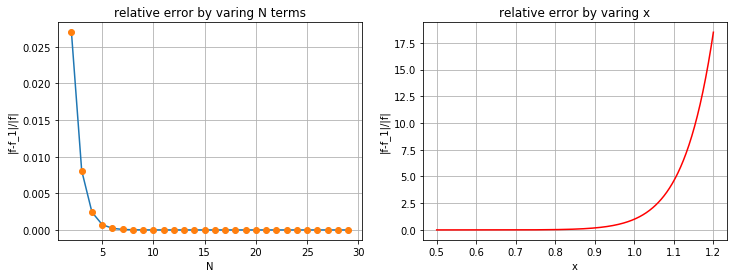

In [3]:
# vary N by start point x0=0.3
N = numpy.arange(2, 30, 1.0)
# true value of the function above
ft = 1.0/(0.3-1.0)
# approximated value of the function above
f_1 = lambda x, N: -(x**numpy.arange(0, N+1)).sum()
fa = numpy.array([f_1(0.3, n) for n in N])
r1 = numpy.abs(ft-fa)/numpy.abs(ft)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)
axes.plot(N, r1)
axes.plot(N, r1, 'o')
plt.grid(True)
axes.set_title("relative error by varing N terms")
axes.set_xlabel("N")
axes.set_ylabel("|f-f_1|/|f|")

# fix N vary x
x1 = numpy.linspace(0.50, 1.20, 500)
ft = 1.0/(x1-1.0)
N = 15
fa = numpy.array([f_1(x, N) for x in x1])
r2 = numpy.abs(ft-fa)/numpy.abs(ft)
axes = fig.add_subplot(1, 2, 2)
axes.plot(x1, r2, 'r-')
plt.grid(True)
axes.set_title("relative error by varing x")
axes.set_xlabel("x")
axes.set_ylabel("|f-f_1|/|f|")

plt.show()

Explanation: If we fix x$_0$ by varing N terms, we see that the relative error becomes small enough as we add more terms. But for fixed N, when x becomes larger, the error becomes huge enough. 

And since x=1 is not defined, we still see there is a relative error = 1.0 at x=1.0.

## Question 2

**(a)** [10] Consider the following two equivalent sums:

$$
    \sum^\infty_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^\infty_{n=1} \frac{1}{n (n + 1)}
$$

Write two Python functions that compute each of these sums but to a finite number of terms $N$.

In [4]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # Starting with the 1st algorithm
    Sn1 = 0.0
    for n in range(1, N+1):
        Sn1 += 1.0/float(n) - 1.0/(float(n)+1.0)

    return Sn1


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # Then start with the 2nd algorithm
    Sn2 = 0.0
    for n in range(1, N+1):
        Sn2 += 1.0/(float(n)*(float(n)+1.0))   
    # or Sn2 += 1.0/float(n*(n+1)), both pass the test
    
    return Sn2

In [5]:
for N in range(5, 21, 5):
    numpy.testing.assert_allclose(sum_1(N), sum_2(N))
print("Success!")

Success!


**(b)** [5] Compute the absolute error between the two summation approaches.

In [6]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # Starting with the subtraction when fixing N
    error = numpy.abs(sum_1(N) - sum_2(N))
    
    return error

In [7]:
N = numpy.logspace(1, 7, 7, dtype=int)
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

Success!


**(c)** [10] Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

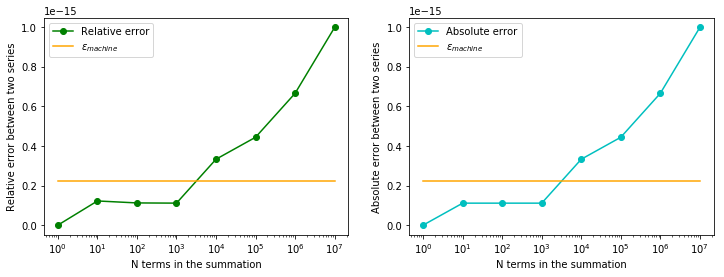

In [8]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
N = numpy.array([10**n for n in range(0, 8)])
Map = numpy.zeros((2, N.shape[0]))
# Using upper_bound function
for (n, upper_bound) in enumerate(N):
    Map[0, n] = numpy.abs(sum_1(upper_bound)-sum_2(upper_bound))/numpy.abs(sum_1(upper_bound))
    Map[1, n] = abs_error(upper_bound)

# plot the relative error
axes = fig.add_subplot(1, 2, 1)
axes.semilogx(N, Map[0, :], 'og-')
# to add machine epsilon, method from stackoverflow
# though dont know what machine epsilon does 
axes.semilogx(N, numpy.ones(N.shape) * numpy.finfo(float).eps, 'orange')
axes.set_xlabel("N terms in the summation")
axes.set_ylabel("Relative error between two series")
plt.legend(["Relative error", "$\epsilon_{machine}$"], loc='upper left')
# plot the absolute error
axes = fig.add_subplot(1, 2, 2)
axes.semilogx(N, Map[1, :], 'oc-')
axes.semilogx(N, numpy.ones(N.shape) * numpy.finfo(float).eps, 'orange')
axes.set_xlabel("N terms in the summation")
axes.set_ylabel("Absolute error between two series")
plt.legend(["Absolute error", "$\epsilon_{machine}$"], loc='upper left')

plt.show()
# As we add more terms in the two series, the relative error and absolute error both increase
# from almost zero to higher level. And both the error climb up and go beyond the machine epsilon when adding 
# more than 1000 terms.

**(d)** [3] Theorize what may have lead to the differences in answers.

Solution: The two curves differ slightly when terms(N) are few, since the relative error and absolute error differ in that the difference in first several terms are wide compared to the machine epsilon.

## Question 3

[10] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


Solution: based on big-O notation, we first derive the sum.

Sum:
$$
\begin{align}
    \frac{1}{1-\Delta x} + cosh \Delta x = 2 + \Delta x + \frac{3 \Delta x^2}{2} + \Delta x^3 + O(\Delta x^4)
\end{align}
$$
Then for product:
$$
\begin{align}
    \frac{1}{1-\Delta x} \cdot cosh \Delta x &=1 + \Delta x + \Delta x^2 + \Delta x^3 + \frac{\Delta x^2}{2} + \frac{\Delta x^3}{2} + O(\Delta x^4)  \\
    &= 1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + O(\Delta x^4)
\end{align}
$$


## Question 4

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** [15] Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

Solution: Consider the floating point error on the representation of x and y. 
$$
\begin{align}
    \text {fl}(f(x,y)) = \frac{1}{x(1+ \delta _x) + y(1+ \delta _y)}
\end{align}
$$
Then for relative error
$$
\begin{align}
    r &= \frac{\frac{1}{x+y} - \frac{1}{x(1+ \delta _x) + y(1+ \delta _y)}}{\frac{1}{x+y}} \\
    &= 1 - \frac{x+y}{x(1+ \delta _x) + y(1+ \delta _y)} \\
    &= 1 - \frac{1}{1+\frac{x}{x+y}\delta_x + \frac{y}{x+y}\delta_y} \\
    &= 1 - \frac{1}{1 + \frac{x\delta_x + y\delta_y}{x+y}}
\end{align}
$$
As the relative size of x+y approaches zero, the relative error could be arbitrarily large.

**(b)** [10] Demonstrate this behavior by plotting the relative error.

In [ ]:
# Similar to the catastrophic cancenllation in lecture 04_error
# Construct 1/dx = 1/(x+y) ideally
dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
# relative error by definition = [1/(x+y) - 1/dx]/1/dx
error = numpy.abs(dx/(x+y) - 1.0) 

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("relative error")
axes.set_title("$\Delta x$ vs Relative Error")

plt.show()

## Question 5

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-2, 2]$.

**(a)** [5] Calculate how many numbers can we represent with this system?  What are the underflow and overflow limits?

Solution: The base 4 system is by definition
$$
\begin{align}
    f = \pm d_1\cdot d_2d_3 \times 4^E \quad \text{with} \quad E \in [-2, 2]
\end{align}
$$
Then there are
$$
\begin{align}
    2 \times 3 \times 4 \times 4 \times 5 + 1 = 481 \quad \text{numbers}
\end{align}
$$
With two limits
$$
\begin{align}
    \text{overflow limit:}~~&3.33 \times 4^2 = 63 \\
    \text{underflow limit:}~~&1.00 \times 4^{-2} = 0.0625 \\
\end{align}
$$

**(b)** [5] Graphically show how the numbers on the decimal real line are distributed.

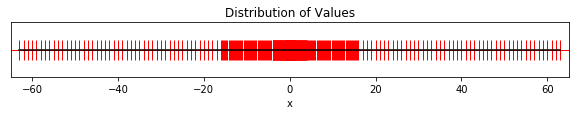

In [5]:
# the base 4 system
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [2, 1, 0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
                
                
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-63.0, 63.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-65, 65])
plt.show()

**(c)** [2] How many more numbers can we store in $N$ base-pairs versus $N$ bits where the mantissa and exponent are the same relative length?

Solution: For N base-pairs,
$$
\begin{align}
    f = \pm d_1\cdot d_2d_3 \times N^E \quad \text{with} \quad E \in [-2, 2]
\end{align}
$$  
Then we can store:
$$
\begin{align}
    2 \times (N-1) \times N \times N \times 5 +1 = 10N^2(N-1)+1
\end{align}
$$

For N bits, it takes 3 bits to cover 5 kinds of numbers in E$\in${-2,2}.

So for 
```
  S EEE FFF \cdots FF 
  0 1 3 4           N-1
```
Then we have 
$$
\begin{align}
    2 \times 1 \times 2^{N-5} \times 5 + 1 = 10 \times 2^{N-5} + 1
\end{align}
$$

Then the difference will be 
$$
\begin{align}
    d = 10 \times (N^3 - N^2 - 2^{N-5})
\end{align}
$$